<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45** minutes


In this lab, you will perform data wrangling tasks to prepare raw data for analysis. Data wrangling involves cleaning, transforming, and organizing data into a structured format suitable for analysis. This lab focuses on tasks like identifying inconsistencies, encoding categorical variables, and feature transformation.


## Objectives


After completing this lab, you will be able to:


- Identify and remove inconsistent data entries.

- Encode categorical variables for analysis.

- Handle missing values using multiple imputation strategies.

- Apply feature scaling and transformation techniques.


#### Intsall the required libraries


In [39]:
!pip install pandas
!pip install matplotlib

## Tasks


#### Step 1: Import the necessary module.


### 1. Load the Dataset


<h5>1.1 Import necessary libraries and load the dataset.</h5>


Ensure the dataset is loaded correctly by displaying the first few rows.


In [40]:
# Import necessary libraries
import pandas as pd
import numpy as np
# Load the Stack Overflow survey data
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(dataset_url)

# Display the first few rows
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

#### 2. Explore the Dataset


<h5>2.1 Summarize the dataset by displaying the column data types, counts, and missing values.</h5>


In [41]:
# Write your code here
print(df.info())
print(f"Data Types of the Dataset\n",df.dtypes)
print(f"Unique value count\n", df.nunique())
print(f"Missing value Count\n",df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65457 entries, 0 to 65456
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None
Data Types of the Dataset
 ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object
Unique value count
 ResponseId             65437
MainBranch                 5
Age                        8
Employment               110
RemoteWork                 3
                       ...  
JobSatPoints_11           79
SurveyLength               3
SurveyEase                 3
ConvertedCompYearly     6113
JobSat                    11
Length: 114, dtype: int64
Missing value Count
 ResponseId                 0


<h5>2.2 Generate basic statistics for numerical columns.</h5>


In [42]:
# Write your code here
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65457.000000,3.374400e+04,29664.000000,29330.000000,29399.000000,29417.000000,29456.000000,29454.000000,29462.000000,29462.000000,29456.000000,29451.000000,2.343700e+04,29131.000000
mean,32714.493591,2.963490e+145,11.466323,18.578998,7.520604,10.059485,24.339971,22.964277,20.279127,16.167837,10.953481,9.953618,8.615893e+04,6.934915
std,18892.431636,5.443794e+147,9.168205,25.965347,18.421094,21.831924,27.088870,27.017634,26.110706,24.844177,22.904463,21.775070,1.867532e+05,2.088356
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16354.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32716.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.000000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49076.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.000000,25.000000,20.000000,10.000000,10.000000,1.080000e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


### 3. Identifying and Removing Inconsistencies


<h5>3.1 Identify inconsistent or irrelevant entries in specific columns (e.g., Country).</h5>


In [43]:
# Write your code here
unique_countries=df['Country'].unique()
print(len(unique_countries))
#Checking for 'Korea', 'Democratic', 'Republic',
#for value in unique_countries:
#    if(value.find("Korea")>-1):
#        print(value)
#Democratic People's Republic of Korea is same as North Korea
#Republic of Korea is South Korea
df['Country']=df['Country'].str.replace("Democratic People's Republic of Korea","North Korea")
df['Country']=df['Country'].str.replace("Republic of Korea","South Korea")
print(len(df['Country'].unique()))
print(df['Country'].unique())
df['Country'].isnull().sum()

186
184
['United States of America'
 'United Kingdom of Great Britain and Northern Ireland' 'Canada' 'Norway'
 'Uzbekistan' 'Serbia' 'Poland' 'Philippines' 'Bulgaria' 'Switzerland'
 'India' 'Germany' 'Ireland' 'Italy' 'Ukraine' 'Australia' 'Brazil'
 'Japan' 'Austria' 'Iran, Islamic Republic of...' 'France' 'Saudi Arabia'
 'Romania' 'Turkey' 'Nepal' 'Algeria' 'Sweden' 'Netherlands' 'Croatia'
 'Pakistan' 'Czech Republic' 'Republic of North Macedonia' 'Finland'
 'Slovakia' 'Russian Federation' 'Greece' 'Israel' 'Belgium' 'Mexico'
 'United Republic of Tanzania' 'Hungary' 'Argentina' 'Portugal'
 'Sri Lanka' 'Latvia' 'China' 'Singapore' 'Lebanon' 'Spain' 'South Africa'
 'Lithuania' 'Viet Nam' 'Dominican Republic' 'Indonesia' 'Kosovo'
 'Morocco' 'Taiwan' 'Georgia' 'San Marino' 'Tunisia' 'Bangladesh'
 'Nigeria' 'Liechtenstein' 'Denmark' 'Ecuador' 'Malaysia' 'Albania'
 'Azerbaijan' 'Chile' 'Ghana' 'Peru' 'Bolivia' 'Egypt' 'Luxembourg'
 'Montenegro' 'Cyprus' 'Paraguay' 'Kazakhstan' 'Slovenia' 'J

np.int64(6508)

<h5>3.2 Standardize entries in columns like Country or EdLevel by mapping inconsistent values to a consistent format.</h5>


In [44]:
## Write your code here
print("Education Level Prior to altering Inconsistency")
print(df['EdLevel'].value_counts())
df['EdLevel']=df['EdLevel'].str.replace("Some college/university study without earning a degree","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)")
print("Education Level After altering the Inconsistency")
print(df['EdLevel'].value_counts())

Education Level Prior to altering Inconsistency
EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          24947
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15560
Some college/university study without earning a degree                                 7656
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     5795
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2972
Associate degree (A.A., A.S., etc.)                                                    1793
Primary/elementary school                                                              1148
Something else                                                                          932
Name: count, dtype: int64
Education Level After altering the Inconsistency
EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          24947
Master’s degree (M.A., M.S., M.En

### 4. Encoding Categorical Variables


<h5>4.1 Encode the Employment column using one-hot encoding.</h5>


### 5. Handling Missing Values


<h5>5.1 Identify columns with the highest number of missing values.</h5>


In [45]:
## Write your code here
missing_values=df.isnull().sum().sort_values(ascending=False)
print("Column with highest missing values and its count")
print(missing_values.head(1))

Column with highest missing values and its count
AINextMuch less integrated    64309
dtype: int64


<h5>5.2 Impute missing values in numerical columns (e.g., `ConvertedCompYearly`) with the mean or median.</h5>


In [46]:
## Write your code here
print("Total number of missing values in ConvertedCompYearly",df['ConvertedCompYearly'].isnull().sum())
median_salary=df['ConvertedCompYearly'].median()
print("Median Salary to be replaced in this dataset",median_salary)
df['ConvertedCompYearly']=df['ConvertedCompYearly'].fillna(median_salary)
df['ConvertedCompYearly'].isnull().sum()

Total number of missing values in ConvertedCompYearly 42020
Median Salary to be replaced in this dataset 65000.0


np.int64(0)

<h5>5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.</h5>


In [47]:
## Write your code here
print("Total number of missing values in RemoteWork",df['RemoteWork'].isnull().sum())
Frequent_value=df['RemoteWork'].value_counts().sort_values(ascending=False).idxmax()
print("Replacing missing values with",Frequent_value)
df['RemoteWork']=df['RemoteWork'].fillna(Frequent_value)
print("Missing values after imputing",df['RemoteWork'].isnull().sum())

Total number of missing values in RemoteWork 10637
Replacing missing values with Hybrid (some remote, some in-person)
Missing values after imputing 0


### 6. Feature Scaling and Transformation


<h5>6.1 Apply Min-Max Scaling to normalize the `ConvertedCompYearly` column.</h5>


In [48]:
## Write your code here
# Find the minimum and maximum values in 'ConvertedCompYearly'
min_value = df['ConvertedCompYearly'].min()
max_value = df['ConvertedCompYearly'].max()

# Apply Min-Max normalization to 'ConvertedCompYearly'
df['ConvertedCompYearly_MinMax'] = (df['ConvertedCompYearly'] - min_value) / (max_value - min_value)

<h5>6.2 Log-transform the ConvertedCompYearly column to reduce skewness.</h5>


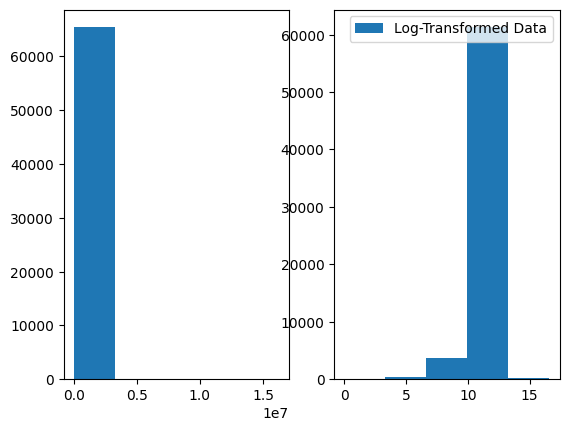

In [49]:
## Write your code here
import matplotlib.pyplot as plt
log_data = np.log(df['ConvertedCompYearly'])

# Plot the original data and the log-transformed data
fig, ax = plt.subplots(1, 2)

ax[0].hist(df['ConvertedCompYearly'], bins=5, label='Original Data')
ax[1].hist(log_data, bins=5, label='Log-Transformed Data')
plt.legend()
plt.show()


### 7. Feature Engineering


<h5>7.1 Create a new column `ExperienceLevel` based on the `YearsCodePro` column:</h5>


In [50]:
## Write your code here
df=df.dropna(subset=['YearsCodePro'])
df['YearsCodePro']=df['YearsCodePro'].replace("Less than 1 year",1)
df['YearsCodePro']=df['YearsCodePro'].replace("More than 50 years",50)
print(df['YearsCodePro'].dtype)
df['YearsCodePro']=df['YearsCodePro'].astype('int')
conditions = [
    (df['YearsCodePro'] <= 3),
    (df['YearsCodePro'] > 3) & (df['YearsCodePro'] <= 15),
    (df['YearsCodePro'] > 15) & (df['YearsCodePro'] <= 25),
    (df['YearsCodePro'] > 25)
]
Levels = ['Beginner', 'Intermediate', 'Proficient','Expert']

df['ExperienceLevel'] = np.select(conditions, Levels, default='unknown')
df['ExperienceLevel'].value_counts()

object


ExperienceLevel
Intermediate    26332
Beginner        13760
Proficient       7644
Expert           3887
Name: count, dtype: int64

### Summary


In this lab, you:

- Explored the dataset to identify inconsistencies and missing values.

- Encoded categorical variables for analysis.

- Handled missing values using imputation techniques.

- Normalized and transformed numerical data to prepare it for analysis.

- Engineered a new feature to enhance data interpretation.


Copyright © IBM Corporation. All rights reserved.
